In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fall-guys-metacritic-reviews/fall_guys_metacritic_reviews.csv


In [36]:
df=pd.read_csv(r'/kaggle/input/fall-guys-metacritic-reviews/fall_guys_metacritic_reviews.csv')

In [37]:
df.head()

,username,review_type,published_date,score,votes,review_text,profile_url,platform
0,Fen1ma,user,"Aug 26, 2020",6.0,0.0,"на данный момент не советую покупать игру, ещё...",https://www.metacritic.com/user/Fen1ma,pc
1,Locke_VI,user,"Aug 25, 2020",3.0,0.0,Fall Guys was a game I was really looking forw...,https://www.metacritic.com/user/Locke_VI,pc
2,Crisener,user,"Aug 25, 2020",8.0,0.0,You gotta love it. The aesthetics are very col...,https://www.metacritic.com/user/Crisener,pc
3,EnigmaXtreme,user,"Aug 25, 2020",7.0,0.0,When we covered Fall Guys last week during it’...,https://www.metacritic.com/user/EnigmaXtreme,pc
4,nitorita,user,"Aug 23, 2020",7.0,0.0,I like how Fall Guys adapted Mario Party and m...,https://www.metacritic.com/user/nitorita,pc


# data cleaning

In [38]:
df.shape

(354, 8)

In [39]:
df.isnull().sum()

username           0
review_type       13
published_date    13
score             25
votes             25
review_text       25
profile_url       37
platform          37
dtype: int64

In [40]:
df['review_type'].unique()

array(['user', 'https://www.metacritic.com/user/darli1ng', nan,
       'https://www.metacritic.com/user/MyNamesCable',
       'https://www.metacritic.com/user/samurai400z',
       'https://www.metacritic.com/user/andgarciabr',
       'https://www.metacritic.com/user/Mangle25',
       'https://www.metacritic.com/user/Spetex',
       'https://www.metacritic.com/user/PonchikDen',
       'https://www.metacritic.com/user/Traxillion',
       'https://www.metacritic.com/user/noans',
       'https://www.metacritic.com/user/KristerFister',
       'https://www.metacritic.com/user/Guizin',
       'https://www.metacritic.com/user/Ruzaky'], dtype=object)

In [41]:
df.drop(columns=['review_type','published_date','published_date'],inplace=True)

In [42]:
df.head()

,username,score,votes,review_text,profile_url,platform
0,Fen1ma,6.0,0.0,"на данный момент не советую покупать игру, ещё...",https://www.metacritic.com/user/Fen1ma,pc
1,Locke_VI,3.0,0.0,Fall Guys was a game I was really looking forw...,https://www.metacritic.com/user/Locke_VI,pc
2,Crisener,8.0,0.0,You gotta love it. The aesthetics are very col...,https://www.metacritic.com/user/Crisener,pc
3,EnigmaXtreme,7.0,0.0,When we covered Fall Guys last week during it’...,https://www.metacritic.com/user/EnigmaXtreme,pc
4,nitorita,7.0,0.0,I like how Fall Guys adapted Mario Party and m...,https://www.metacritic.com/user/nitorita,pc


In [43]:
df['score'].unique()

array([ 6.,  3.,  8.,  7., 10.,  4.,  5.,  9.,  1.,  0.,  2., nan])

In [44]:
df.shape

(354, 6)

In [45]:
df.isnull().any()

username       False
score           True
votes           True
review_text     True
profile_url     True
platform        True
dtype: bool

In [46]:
## we have to predict the score based on the text give so we dont need other columns
df.drop(columns=['username','votes','profile_url','platform'],inplace=True)

In [47]:
df.head()

,score,review_text
0,6.0,"на данный момент не советую покупать игру, ещё..."
1,3.0,Fall Guys was a game I was really looking forw...
2,8.0,You gotta love it. The aesthetics are very col...
3,7.0,When we covered Fall Guys last week during it’...
4,7.0,I like how Fall Guys adapted Mario Party and m...


In [48]:
df.describe()

,score
count,329.000000
mean,6.802432
std,3.340512
min,0.000000
25%,5.000000
50%,8.000000
75%,10.000000
max,10.000000


In [49]:
df['score'].value_counts()

10.0    83
8.0     61
9.0     50
0.0     34
7.0     26
6.0     20
5.0     15
2.0     12
1.0     11
3.0     10
4.0      7
Name: score, dtype: int64

# visualization

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

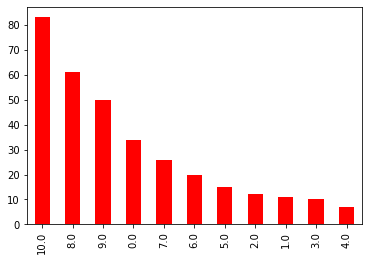

In [51]:
df['score'].value_counts().plot(kind='bar',color='r')

In [52]:
train_qs = pd.Series(df['review_text'].tolist()).astype(str)

(-0.5, 1439.5, 1079.5, -0.5)

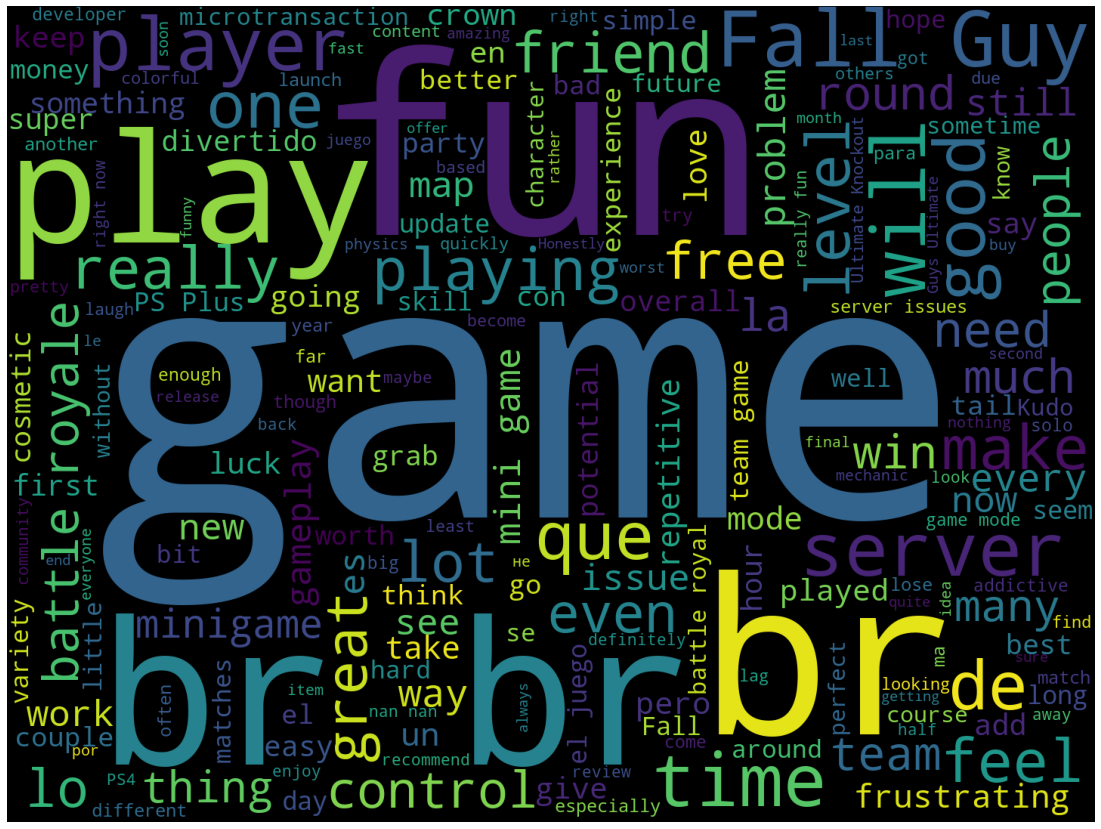

In [53]:
from wordcloud import WordCloud
cloud = WordCloud(width=1440, height=1080).generate(" ".join(train_qs.astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

# feature extraction

In [54]:
import nltk
from nltk.corpus import stopwords
import re

In [55]:
df.head(56)

,score,review_text
0,6.0,"на данный момент не советую покупать игру, ещё..."
1,3.0,Fall Guys was a game I was really looking forw...
2,8.0,You gotta love it. The aesthetics are very col...
3,7.0,When we covered Fall Guys last week during it’...
4,7.0,I like how Fall Guys adapted Mario Party and m...
5,10.0,Absolutely love this game. I can't put it dow...
6,4.0,Team modes ruin this game.\r<br/>\r<br/>Nearly...
7,8.0,With the servers largely fixed and them findin...
8,8.0,Fall Guys: Ultimate Knockout Really fun party ...
9,5.0,"At the moment, this game feels a bit overprice..."


In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score,classification_report
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
stopset=set(stopwords.words('english'))
vector=TfidfVectorizer(use_idf=True,lowercase=True,strip_accents='ascii',stop_words=stopset)

In [58]:
df.dropna(inplace=True)

In [59]:
vector.fit(df)

TfidfVectorizer(stop_words={'a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', 'couldn', "couldn't", ...},
                strip_accents='ascii')

In [60]:
y=df.score
x=vector.fit_transform(df.review_text)

In [61]:
x.shape

(329, 3356)

# model creation

In [62]:
from sklearn.tree import DecisionTreeClassifier
tr= DecisionTreeClassifier()

In [63]:
tr.fit(x,y)

DecisionTreeClassifier()

In [64]:
pr=tr.predict(x)
pr

array([ 6.,  3.,  8.,  7.,  7., 10.,  4.,  8.,  8.,  5., 10.,  9.,  5.,
       10.,  5.,  8., 10., 10.,  8.,  3.,  4., 10., 10., 10., 10.,  7.,
       10.,  8.,  7., 10.,  1., 10., 10.,  8.,  8.,  8.,  8., 10.,  8.,
       10., 10.,  8.,  9., 10.,  0.,  9.,  8.,  0.,  6.,  9.,  8.,  0.,
        8.,  4., 10.,  2.,  9.,  7.,  9.,  8., 10.,  9.,  8.,  8.,  9.,
        9., 10., 10.,  7.,  9.,  8.,  8.,  6., 10., 10., 10.,  1.,  5.,
        8.,  8.,  8.,  5., 10.,  3.,  8., 10.,  2.,  6.,  6.,  2.,  8.,
        4.,  8.,  0.,  8.,  2.,  0.,  0.,  8.,  8.,  6.,  7.,  8., 10.,
        9., 10.,  9.,  0.,  5.,  8.,  3., 10.,  0., 10.,  0., 10.,  8.,
        8.,  0.,  1.,  8.,  5.,  2.,  9., 10.,  9.,  7.,  7.,  0.,  8.,
       10.,  8., 10., 10.,  8., 10.,  3.,  0.,  8.,  8.,  6., 10.,  9.,
        0.,  8.,  3.,  7., 10.,  9.,  8., 10.,  4.,  1.,  0., 10., 10.,
        9., 10., 10.,  9.,  8.,  7., 10.,  6.,  1., 10.,  3.,  2.,  8.,
        9.,  6.,  9., 10.,  7.,  0., 10., 10., 10.,  4.,  0.,  9

In [65]:
print(classification_report(y,pr))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        34
         1.0       1.00      1.00      1.00        11
         2.0       1.00      1.00      1.00        12
         3.0       1.00      1.00      1.00        10
         4.0       1.00      1.00      1.00         7
         5.0       1.00      1.00      1.00        15
         6.0       1.00      1.00      1.00        20
         7.0       1.00      0.96      0.98        26
         8.0       0.98      1.00      0.99        61
         9.0       1.00      0.96      0.98        50
        10.0       0.98      1.00      0.99        83

    accuracy                           0.99       329
   macro avg       1.00      0.99      0.99       329
weighted avg       0.99      0.99      0.99       329



In [66]:
from sklearn.metrics import confusion_matrix

In [67]:
print(confusion_matrix(y,pr))

[[34  0  0  0  0  0  0  0  0  0  0]
 [ 0 11  0  0  0  0  0  0  0  0  0]
 [ 0  0 12  0  0  0  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0  0  0  0]
 [ 0  0  0  0  7  0  0  0  0  0  0]
 [ 0  0  0  0  0 15  0  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0  0]
 [ 0  0  0  0  0  0  0 25  0  0  1]
 [ 0  0  0  0  0  0  0  0 61  0  0]
 [ 0  0  0  0  0  0  0  0  1 48  1]
 [ 0  0  0  0  0  0  0  0  0  0 83]]


### if we observe the above classification report and confusion matrix our model is predicting pretty good with good accuracy and f1_score